                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     898.7
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          9.07e-283
Time:                        15:01:37   Log-Likelihood:                -3727.4
No. Observations:                1000   AIC:                             7463.
Df Residuals:                     996   BIC:                             7482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

<Figure size 1000x600 with 0 Axes>

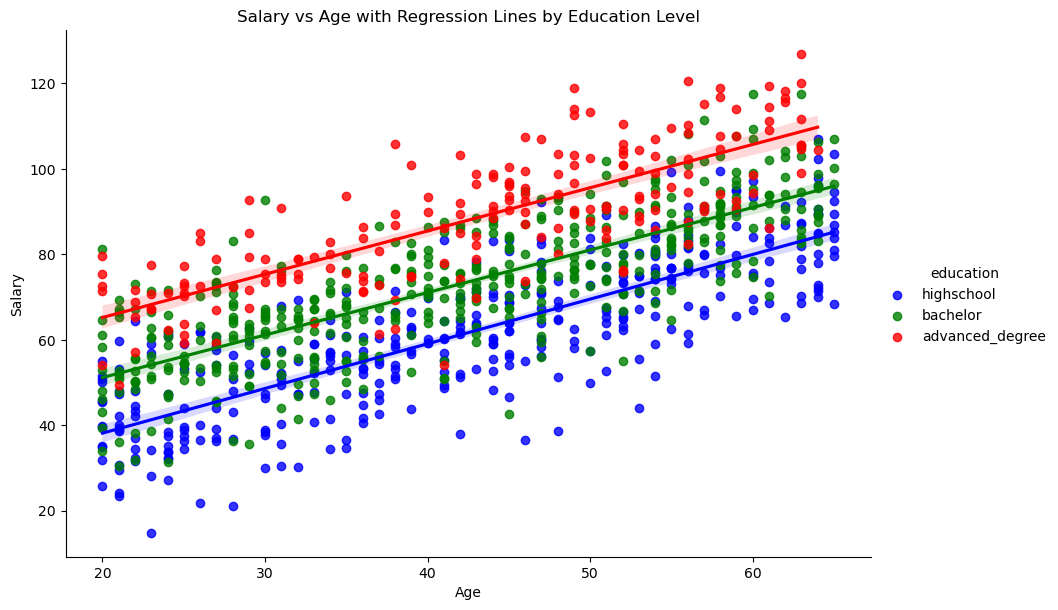

In [49]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("salary_data.csv")

# Convert education to a categorical variable and set 'highschool' as the reference level
data['education'] = pd.Categorical(data['education'], categories=['highschool', 'bachelor', 'advanced_degree'])

# Perform linear regression using statsmodels
model = smf.ols('salary ~ age + C(education)', data=data).fit()

# View the summary of the model
print(model.summary())

# Get the variance-covariance matrix for the model coefficients
vcov_matrix = model.cov_params()
print("Variance-Covariance Matrix of Coefficients:")
print(vcov_matrix)

# Predict on the dataset (if required)
predictions = model.predict(data)

# Add predictions to the dataset
data['predicted_salary'] = predictions

# Create a scatter plot with regression lines for each education category
plt.figure(figsize=(10, 6))

# Create regression lines for each education level
sns.lmplot(x='age', y='salary', hue='education', data=data, palette={'highschool': 'blue', 'bachelor': 'green', 'advanced_degree': 'red'}, ci=95, height=6, aspect=1.5)

# Customize plot
plt.title('Salary vs Age with Regression Lines by Education Level')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


In [47]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("salary_data.csv")

# Retain the original education column for plotting
education_plot = data['education']

# Convert education to dummy variables for regression
data = pd.get_dummies(data, columns=['education'], drop_first=True, dtype=int)
data.head()

# Perform linear regression using the numeric education variable
X = data[['age', 'education_bachelor','education_highschool']]  # Independent variables
X = sm.add_constant(X)  # Adds a constant term to the regression
y = data['salary']  # Dependent variable

# Create the linear regression model
model = sm.OLS(y, X).fit()

# View the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     898.7
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          9.07e-283
Time:                        14:59:37   Log-Likelihood:                -3727.4
No. Observations:                1000   AIC:                             7463.
Df Residuals:                     996   BIC:                             7482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6783 